# Term Project : Algorithm - Regression
## Data Science, 2024 Spring
### 2024-06-02

In [9]:
!pip install openpyxl==3.1.0

In [73]:
# Term Project : Algorithm - Regression
# 2024-06-02

# Import Packages & Initial Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn import tree
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV

sns.set(style='whitegrid')

In [40]:
file_path = '../data/integration_b.csv'
data = pd.read_csv(file_path, index_col='Date')
# Drop first column (Integer Index)
# data.drop(data.columns[0], axis=1, inplace=True)

In [41]:
# # xlsx_file_path = 'integrationV2.xlsx'

# # # Read Data from xlsx file, Set first row(Row #0) as header
# # data = pd.read_excel(xlsx_file_path, header=0)
# # Drop first column (Integer Index)
# data.drop(data.columns[0], axis=1, inplace=True)

# # Set Date to Index
# date_col = [col for col in data.columns if 'Date' in col][0]
# data.set_index(date_col, inplace=True)

In [42]:
# Printout DataFrame
print(data.head(3))
print(data.info())

            Total Traffic Volume  Exchange Rate  Gross Domestic Product (GDP)  \
Date                                                                            
2011-01-01               5466446    1121.500000                      328096.0   
2011-01-02               5059821    1121.732258                      328096.0   
2011-01-03               5631394    1121.964516                      328096.0   

            Export growth rate  Import growth rate  \
Date                                                 
2011-01-01           44.700000           13.600000   
2011-01-02           43.775943           13.521635   
2011-01-03           42.851885           13.443269   

            Nationwide Consumer Price Index  Regular Unleaded Gasoline  \
Date                                                                     
2011-01-01                        90.448000                    1814.57   
2011-01-02                        90.397806                    1815.24   
2011-01-03                 

In [43]:
# Encoding Categorical Data (If needs)

# Economic Growth Rate
encoding_dict = {'High Growth':2, 'Moderate Growth':1, 'Low Growth':0.5, 'Negative Growth':-1}
data['Economic Growth Rate'] = data['Economic Growth Rate'].map(encoding_dict)

# Interest Rate Category
encoding_dict = {'Low':1, 'Moderate':2}
data['Interest Rate Category'] = data['Interest Rate Category'].map(encoding_dict)

# Export Price Category
encoding_dict = {'Low':1, 'Medium':1.5, 'High':2, 'Very High':2.5}
data['Export Price Category'] = data['Export Price Category'].map(encoding_dict)

data['Import Price Category'] = data['Import Price Category'].map(encoding_dict)

# Printout DataFrame After Encoding Categorical Data to Numerical
print(data.head(3))
print(data.info())

            Total Traffic Volume  Exchange Rate  Gross Domestic Product (GDP)  \
Date                                                                            
2011-01-01               5466446    1121.500000                      328096.0   
2011-01-02               5059821    1121.732258                      328096.0   
2011-01-03               5631394    1121.964516                      328096.0   

            Export growth rate  Import growth rate  \
Date                                                 
2011-01-01           44.700000           13.600000   
2011-01-02           43.775943           13.521635   
2011-01-03           42.851885           13.443269   

            Nationwide Consumer Price Index  Regular Unleaded Gasoline  \
Date                                                                     
2011-01-01                        90.448000                    1814.57   
2011-01-02                        90.397806                    1815.24   
2011-01-03                 

In [44]:
data = data.dropna()

In [45]:
# Set X, y
X = data.drop(columns=['Total Traffic Volume'])
y = data['Total Traffic Volume']

In [46]:
# # (If needs) NaN이 있는 row만 선택
# rows_with_nan = data[data.isnull().any(axis=1)]

# print(rows_with_nan)

In [47]:
# Split dataset -> Train Dataset : Test Dataset = 8:2 (데이터를 학습용과 테스트용으로 분할)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [48]:
########## Linear Regression

# Create LinearRegression model instance & Train model
model_linear = LinearRegression()
model_linear.fit(X_train, y_train)

LinearRegression()

In [49]:
# Predict with Test Dataset
y_pred_linear = model_linear.predict(X_test)

In [50]:
# Evaluate Model (모델 성능 평가)
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print("[Linear Regression] Mean Squared Error:", mse_linear)
print("[Linear Regression] R^2 Score:", r2_linear)

[Linear Regression] Mean Squared Error: 585910530097.0436
[Linear Regression] R^2 Score: 0.7336228425248923


### Visualize - Linear Regression

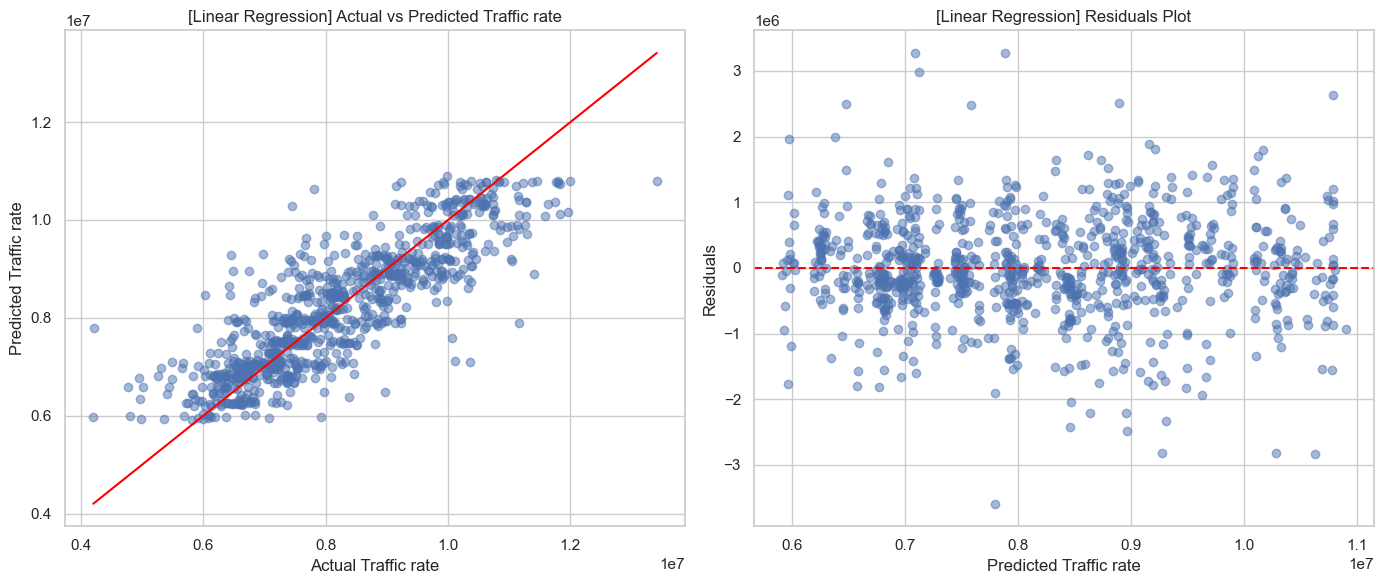

In [51]:
########## Visualize - Linear Regression

plt.figure(figsize=(14, 6))

# Scatter (Actual vs Predicted) 산점도: 실제 값 vs 예측 값
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_linear, alpha=0.5)
plt.xlabel("Actual Traffic rate")
plt.ylabel("Predicted Traffic rate")
plt.title("[Linear Regression] Actual vs Predicted Traffic rate")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')

# Plot residuals (잔차 플롯)
plt.subplot(1, 2, 2)
residuals_linear = y_test - y_pred_linear
plt.scatter(y_pred_linear, residuals_linear, alpha=0.5)
plt.xlabel("Predicted Traffic rate")
plt.ylabel("Residuals")
plt.title("[Linear Regression] Residuals Plot")
plt.axhline(0, color='red', linestyle='--')

plt.tight_layout()
plt.show()

### Random Forest Regression (Ensemble method)

In [52]:
############## Random Forest Regression (Ensemble method)

model_randomForest = RandomForestRegressor(n_estimators=100, random_state=42)
model_randomForest.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [53]:
# Predict with Test Dataset
y_pred_randomForest = model_randomForest.predict(X_test)

In [54]:
# Print out Feature Importance Score & Features name
importances = model_randomForest.feature_importances_
names = model_randomForest.feature_names_in_
estimator_list = model_randomForest.estimators_

print("Importances:", importances)
print("Names:", names)

Importances: [7.59757929e-02 4.83806802e-01 4.69106149e-02 4.54076295e-02
 8.22970846e-02 3.90163784e-02 3.82993958e-02 1.84007822e-01
 9.42870424e-04 4.08666697e-05 2.08973117e-03 1.20501084e-03]
Names: ['Exchange Rate' 'Gross Domestic Product (GDP)' 'Export growth rate'
 'Import growth rate' 'Nationwide Consumer Price Index'
 'Regular Unleaded Gasoline' 'Diesel Fuel for Automobiles'
 'number of car ownership' 'Economic Growth Rate' 'Interest Rate Category'
 'Export Price Category' 'Import Price Category']


### Visualize Fature Importance

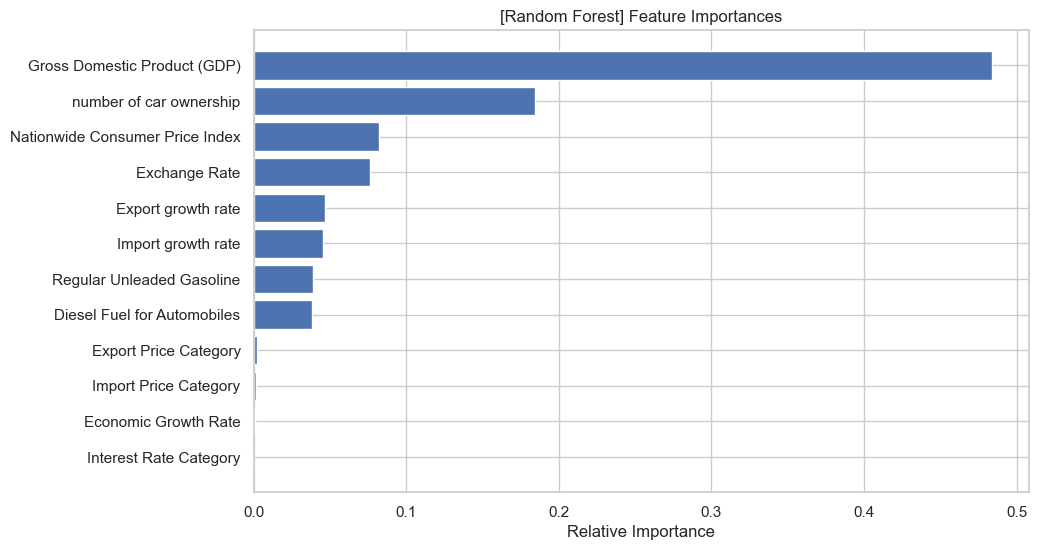

In [55]:
# Visualize Fature Importance with Bar Plot (피처(Feature) 중요도 시각화)
indices = np.argsort(importances)

plt.figure(figsize=(10, 6))
plt.title('[Random Forest] Feature Importances')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [X.columns[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

# sns.barplot(x=names , y=importances)
# plt.title('[Random Forest] Feature Importance')
# plt.show()

# plt.figure(figsize=(20,20))
# tree.plot_tree(model_randomForest.estimators_[0], feature_names=X.columns, filled=True)

In [56]:
# Evaluate Model
mse_randomForest = mean_squared_error(y_test, y_pred_randomForest)
r2_randomForest = r2_score(y_test, y_pred_randomForest)

print("[Random Forest] Mean Squared Error:", mse_randomForest)
print("[Random Forest] R^2 Score:", r2_randomForest)

[Random Forest] Mean Squared Error: 567254901191.6669
[Random Forest] R^2 Score: 0.7421043992531895


### Visualize - Random Forest Regression (Ensemble method)

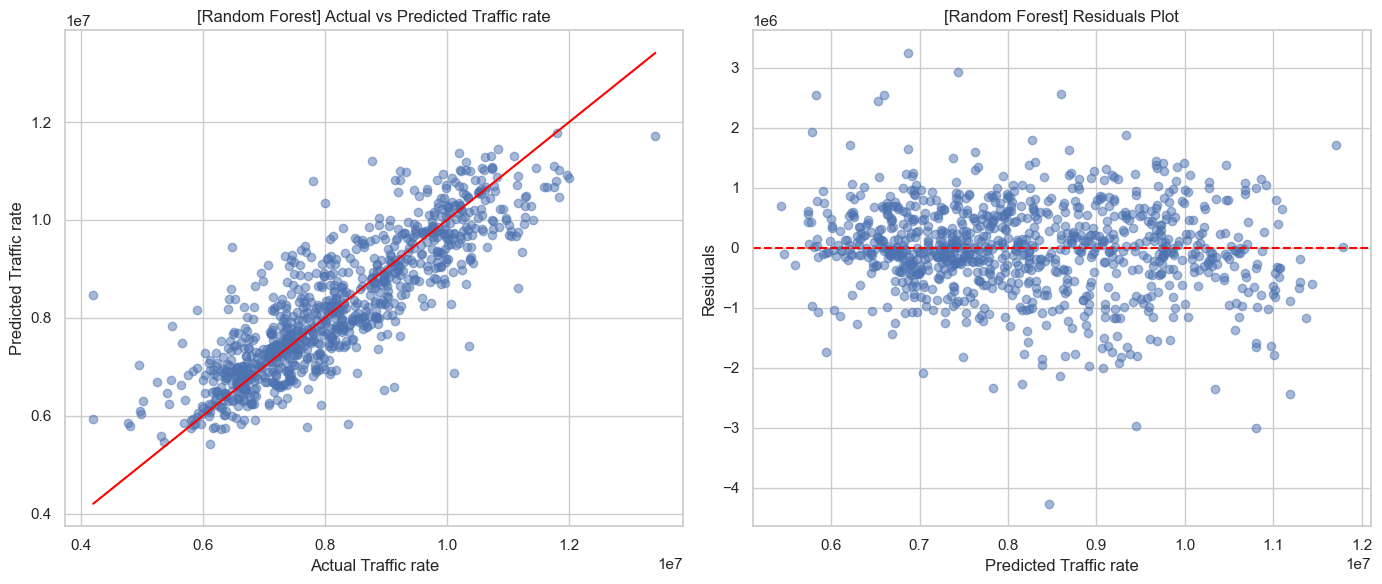

In [57]:
########## Visualize - Random Forest Regression (Ensemble method)

plt.figure(figsize=(14, 6))

# Scatter (Actual vs Predicted) 산점도: 실제 값 vs 예측 값
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_randomForest, alpha=0.5)
plt.xlabel("Actual Traffic rate")
plt.ylabel("Predicted Traffic rate")
plt.title("[Random Forest] Actual vs Predicted Traffic rate")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')

# Plot residuals (잔차 플롯)
plt.subplot(1, 2, 2)
residuals_randomForest = y_test - y_pred_randomForest
plt.scatter(y_pred_randomForest, residuals_randomForest, alpha=0.5)
plt.xlabel("Predicted Traffic rate")
plt.ylabel("Residuals")
plt.title("[Random Forest] Residuals Plot")
plt.axhline(0, color='red', linestyle='--')

plt.tight_layout()
plt.show()

## RandomForestRegressor Hyper Parameter Tuning

In [74]:
# Use RandomizedSearchCV To Find Best Hyperparameters in RandomForestRegressor

# Hyperparameter Range to search
param_dist = {
    'n_estimators': randint(10, 1000),
    'max_depth': randint(5, 50),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
}

rf = RandomForestRegressor()

# 5-Fold : hyperparameter tuning with RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, n_iter=100, cv=5, verbose=2, random_state=42, n_jobs=-1)
random_search.fit(X_train, y_train)

# Print out best hyperparameters and their scores
print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)

# Evaluate with Test Dataset
test_score = random_search.score(X_test, y_test)
print("Test Score:", test_score)


Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Parameters: {'max_depth': 37, 'min_samples_leaf': 14, 'min_samples_split': 17, 'n_estimators': 925}
Best Score: 0.7356539792540313
Test Score: 0.7713404396584551


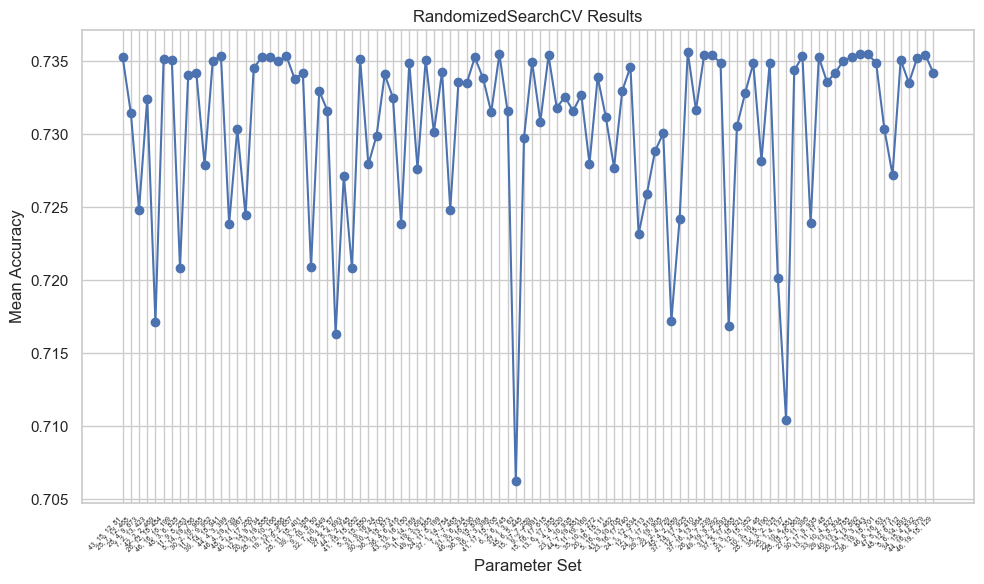

In [77]:
# Visualize result of RandomizedSearchCV
results = random_search.cv_results_
params = results['params']
mean_scores = results['mean_test_score']

# Visualize Scores : With Different hyperparameter values
plt.figure(figsize=(10, 6))
plt.plot(range(len(params)), mean_scores, marker='o')
plt.title('RandomizedSearchCV Results')
plt.xlabel('Parameter Set')
plt.ylabel('Mean Accuracy')
plt.xticks(range(len(params)), [str(param.values()).replace('dict_values([','').replace('])', '') for param in params], rotation=45, fontsize=5, ha='right')
plt.grid(True)
plt.tight_layout()
plt.show()

In [79]:
# Train model with Best Hyperparameters
best_classifier = random_search.best_estimator_
best_classifier.fit(X_train, y_train)

# Predict with Test Dataset
y_pred_best = best_classifier.predict(X_test)

In [80]:
# Evaluate Model
mse_best = mean_squared_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)

print("[Random Forest with tuned hyperparameters] Mean Squared Error:", mse_best)
print("[Random Forest with tuned hyperparameters] R^2 Score:", r2_best)

[Random Forest with tuned hyperparameters] Mean Squared Error: 503255183909.898
[Random Forest with tuned hyperparameters] R^2 Score: 0.7712010989931727


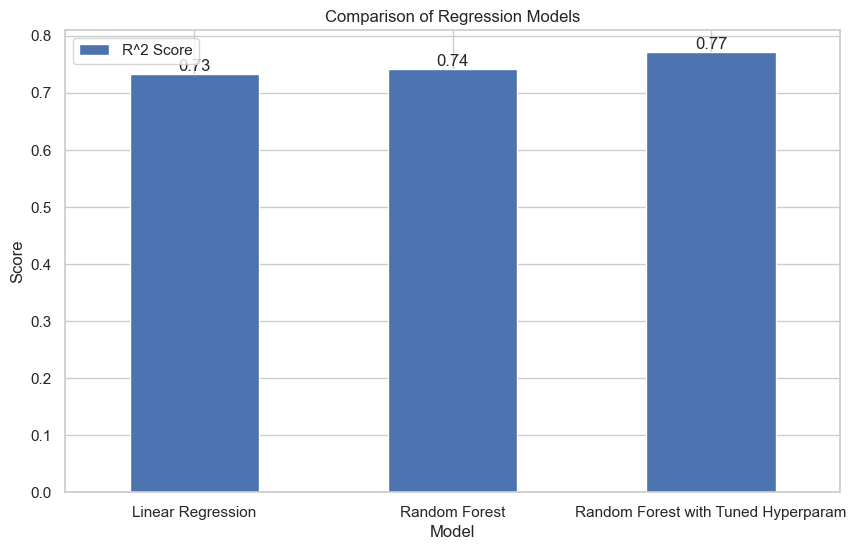

In [82]:
r2_df = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'Random Forest with Tuned Hyperparam'],
    'R^2 Score': [r2_linear, r2_randomForest, r2_best],
})

# Get Bar graph of R^2
ax = r2_df.set_index('Model').plot(kind='bar', figsize=(10, 6))
plt.title('Comparison of Regression Models')
plt.ylabel('Score')
plt.xticks(rotation=0)

# Print R^2 Scores
for i, score in enumerate(r2_df['R^2 Score']):
    ax.text(i, score, f'{score:.2f}', ha='center', va='bottom')



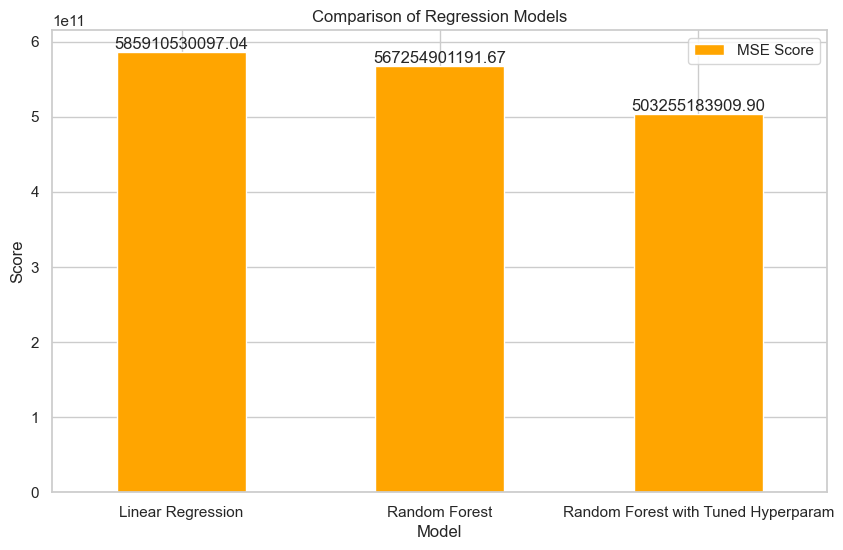

In [83]:
mse_df = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'Random Forest with Tuned Hyperparam'],
    'MSE Score': [mse_linear, mse_randomForest, mse_best],
})

# Get Bar graph of MSE
ax = mse_df.set_index('Model').plot(kind='bar', figsize=(10, 6), color='orange')
plt.title('Comparison of Regression Models')
plt.ylabel('Score')
plt.xticks(rotation=0)

# Print MSE Scores
for i, score in enumerate(mse_df['MSE Score']):
    ax.text(i, score, f'{score:.2f}', ha='center', va='bottom')
